# Multiple Linear Regression

# Outils de prétraitement des données

## Importing the libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [20]:
dataset = pd.read_csv('/content/Mincer.csv')

In [21]:
dataset.drop(['inlf','hours','kidslt6','kidsge6','repwage','hushrs','husage','huseduc','huswage','faminc','mtr','unem','city','nwifeinc','lwage','lwage','expersq'],1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [22]:
print(dataset['wage'])

0      3.3540
1      1.3889
2      4.5455
3      1.0965
4      4.5918
        ...  
748       NaN
749       NaN
750       NaN
751       NaN
752       NaN
Name: wage, Length: 753, dtype: float64


In [23]:
dataset.shape

(753, 6)

In [24]:
print(type(dataset))
#dataset=dataset.dropna().shape
dataset=pd.DataFrame(dataset)

<class 'pandas.core.frame.DataFrame'>


In [25]:
age2=[]
for i in dataset['age']:
  age2.append(i*i)
print(age2)
dataset['age2']=age2

[1024, 900, 1225, 1156, 961, 2916, 1369, 2916, 2304, 1521, 1089, 1764, 900, 1849, 1849, 1225, 1849, 1521, 2025, 1225, 1764, 900, 2304, 2025, 961, 1849, 3481, 1024, 961, 1764, 2500, 3481, 1296, 2601, 2025, 1764, 2116, 2116, 2601, 900, 900, 3249, 961, 2304, 900, 1156, 2304, 2025, 2601, 900, 2116, 3364, 1369, 2704, 2704, 961, 3025, 1156, 3025, 1521, 1600, 1849, 2304, 2209, 1681, 1296, 2116, 1156, 1681, 2601, 1089, 2704, 3364, 1156, 961, 2304, 1024, 2401, 1024, 3364, 2500, 3600, 2500, 3136, 2601, 2916, 3481, 2116, 2116, 1521, 1936, 1089, 1089, 2304, 961, 2025, 2025, 1024, 2209, 1156, 1369, 1296, 2209, 2304, 1764, 1089, 2116, 2209, 1936, 1296, 961, 3025, 2025, 2209, 2116, 2401, 2401, 2025, 1444, 2209, 2916, 1681, 1849, 961, 2209, 1225, 2025, 1089, 2916, 1225, 961, 3025, 1156, 1444, 2025, 2209, 1521, 1296, 1089, 2500, 3364, 2401, 1681, 2601, 2809, 1296, 2116, 1296, 2809, 1600, 1764, 1089, 1849, 961, 2209, 2916, 1089, 1849, 2116, 1225, 1369, 1369, 1156, 1849, 2116, 1225, 2116, 2116, 1849, 900

In [26]:
exper2=[]
for i in dataset['fatheduc']:
  exper2.append(i*i)
print(exper2)
dataset['exper2']=exper2

[49, 49, 49, 49, 196, 49, 49, 9, 49, 49, 9, 49, 256, 100, 49, 100, 49, 144, 49, 49, 256, 100, 9, 49, 49, 196, 49, 49, 144, 144, 49, 9, 100, 196, 144, 9, 9, 9, 49, 289, 144, 81, 256, 9, 49, 49, 256, 100, 49, 49, 49, 9, 49, 49, 9, 144, 49, 289, 49, 49, 9, 144, 49, 49, 49, 144, 256, 49, 49, 49, 144, 100, 81, 0, 100, 196, 49, 9, 144, 144, 49, 289, 9, 49, 49, 144, 49, 49, 144, 100, 0, 144, 100, 49, 49, 49, 9, 144, 49, 144, 49, 49, 100, 196, 49, 144, 49, 49, 100, 49, 144, 49, 49, 289, 49, 49, 49, 100, 100, 144, 49, 144, 49, 100, 49, 100, 49, 49, 49, 49, 49, 49, 256, 144, 49, 9, 49, 49, 49, 144, 49, 144, 144, 196, 49, 49, 49, 144, 144, 196, 100, 144, 49, 256, 49, 289, 9, 100, 81, 49, 9, 256, 144, 49, 49, 49, 144, 9, 49, 49, 49, 49, 100, 100, 49, 144, 289, 100, 49, 49, 144, 49, 144, 49, 49, 49, 49, 196, 49, 144, 49, 49, 144, 9, 49, 144, 144, 49, 49, 196, 144, 289, 289, 49, 49, 100, 49, 49, 49, 9, 0, 49, 144, 49, 49, 144, 49, 49, 144, 49, 49, 9, 49, 49, 100, 144, 49, 144, 49, 49, 49, 49, 144, 4

In [27]:
last_column = dataset.pop('wage') 
dataset.insert(7, 'wage', last_column)

In [35]:
dataset=dataset.dropna()
dataset.columns 

Index(['age', 'educ', 'motheduc', 'fatheduc', 'exper', 'age2', 'exper2',
       'wage'],
      dtype='object')

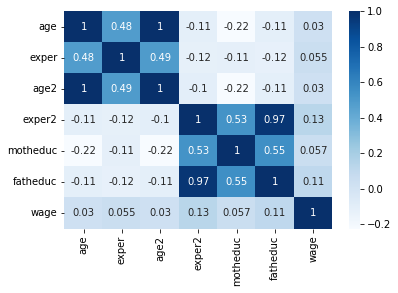

In [36]:
import seaborn as sns
sns.heatmap(dataset[['age', 'exper', 'age2', 'exper2','motheduc', 'fatheduc','wage']].corr(), cmap='Blues', annot=True)
plt.show()

In [29]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(y)

[ 3.35400009  1.38890004  4.5454998   1.09650004  4.59180021  4.74209976
  8.33329964  7.84310007  2.12619996  4.6875      4.0630002   4.59180021
  2.08330011  2.26679993  3.6796999   1.34720004  3.21429992  5.17500019
  2.          7.55289984  3.50519991  3.57139993  3.25        3.25
  2.15450001  3.78789997  4.          4.7269001   7.25589991  5.86709976
  1.53849995  2.45900011  5.85109997  3.57139993  3.80679989  2.46379995
  2.37529993  4.53509998  5.61829996 14.63099957  2.67860007  3.91939998
  2.57290006  4.5374999   2.          3.47219992  2.01609993  4.57159996
  2.27270007  2.63750005  2.28990006  1.09889996  1.17649996  1.60000002
  1.87619996  4.04370022  9.63539982  8.04090023  4.59899998  2.14289999
  4.4000001   3.53539991  2.71740007  6.25       11.93299961  3.59310007
  6.94439983  2.91669989  3.07690001  3.75        5.72590017  3.67569995
  5.16480017  8.22369957  4.33650017  4.98190022  0.35710001  2.96740007
  1.          2.55539989  0.86019999  1.          2.92610

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train)

[[  49   11    7 ...   14 2401   49]
 [  34   12    7 ...   14 1156   49]
 [  37   12   10 ...    4 1369   49]
 ...
 [  45   12    7 ...    9 2025  100]
 [  45   12   10 ...   22 2025  100]
 [  31   12   10 ...   10  961  100]]


In [31]:
print(y_train)


[ 4.09840012  3.37700009  2.9762001   4.74209976  4.08160019  0.66420001
  1.74419999  7.84310007  4.54080009  3.25        3.07690001  4.56449986
  3.50519991  2.56410003  1.19869995  3.6796999   4.3295002   0.47620001
  6.63269997  8.03569984  4.39559984  4.98190022 11.93299961  4.04370022
  1.          2.38960004  2.          4.97629976  3.67569995  2.5
  2.68390012  3.0611999  25.          4.69799995  5.30609989  3.44499993
  9.63539982  2.12619996  3.49160004  4.11670017  3.29859996  2.76920009
 10.45899963  4.89659977  4.          2.90700006  6.25        2.88199997
  0.81900001  2.0710001   3.92860007  1.41540003  2.52530003  2.3118
  4.09840012  6.63269997  1.12170005  3.19749999  5.39349985  3.31590009
  2.20499992  3.02769995  6.94439983  1.25        7.0152998   6.6335001
  2.88179994  2.          6.84929991  2.22219992  5.17500019  3.
  3.54999995  9.59710026  1.53849995  5.81400013  5.61219978  5.23260021
  2.9762001   2.9388001   3.          4.08160019  2.12770009  3.9683001

#supprimmer les NA

## Training the Multiple Linear Regression model on the Training set

In [32]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
coefs = reg.fit(X_train, y_train).coef_
intecept = reg .fit(X_train, y_train).intercept_
print(intecept , coefs)

-4.343301882704624 [ 0.19574978  0.46285543 -0.06225286 -0.22366609  0.0384735  -0.00259535
  0.01358347]


## Predicting the Test set results

In [33]:
y_pred = reg.predict(X_test)
np.set_printoptions(precision=8)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 4.15871052  1.78209996]
 [ 3.97026199  2.77780008]
 [ 3.76998392  1.87619996]
 [ 2.870819    3.30719995]
 [ 4.12568597  4.0630002 ]
 [ 7.03216806 15.38500023]
 [ 6.78987429  5.53200006]
 [ 6.33891473  5.49450016]
 [ 2.82910047  2.60419989]
 [ 3.29728669  2.27539992]
 [ 3.54549769  3.57139993]
 [ 4.05650347  4.36509991]
 [ 3.17320083  4.38840008]
 [ 3.77452901  3.46000004]
 [ 4.03980891  5.63910007]
 [ 5.92876762  7.62179995]
 [ 6.3716284   6.99009991]
 [ 2.4845371   0.12819999]
 [ 3.4926395   3.33330011]
 [ 1.51693813  3.82500005]
 [ 5.68747425  5.38259983]
 [ 3.33542209  3.46149993]
 [ 4.27273055  3.6947999 ]
 [ 3.60416235  1.38890004]
 [ 3.70395421  4.53509998]
 [ 3.04235906  2.06349993]
 [ 2.02962813  3.59310007]
 [ 4.76139831  4.2347002 ]
 [ 3.54906805  3.75      ]
 [ 3.65030233  2.08330011]
 [ 3.81400727  1.75      ]
 [ 5.6820819   6.        ]
 [ 1.86729422  1.74070001]
 [ 3.88085082  3.56159997]
 [ 4.15372443  4.86509991]
 [ 5.88733997  8.18999958]
 [ 4.70295716  4.85830021]
 

In [34]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print('accuracy  socre is ',score)

accuracy  socre is  0.155256039798373
